# Исследование гипотез для увеличения выручки интернет-магазина

## Введение

### Описание проекта
Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки интернет-магазина.

Цель проекта - приоритизировать гипотезы, запустить A/B-тест и проанализировать его результаты. 

### Описание данных

###### Данные для первой части:

Файл /datasets/hypothesis.csv.

* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

###### Данные для второй части:

Файл /datasets/orders.csv.

* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.
* Файл /datasets/visitors.csv. Скачать датасет
* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста

### План работы над проектом

1. Загрузка данных и их предподготовка к анализу
2. Исследовательский анализ данных
3. Приоритизация гипотез (применение фреймфорков ICE и RICE)
3. Анализ результатов A/B-теста
4. Общий вывод по проекту

## Основная часть

### Загрузка данных и их предподготовка к анализу

In [1]:
# Импортируем библиотеки pandas для открытия и изучения исходных данных.

import pandas as pd
pd.set_option('display.max_colwidth', False)
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import requests
import re
import math
from scipy import stats as st
from math import factorial
from scipy.stats import binom
import seaborn as sns
import datetime as dt
from pandas.plotting import register_matplotlib_converters
import scipy.stats as stats
import math as mth


# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Cохраним исходные данные в переменную games

try:
    hypothesis = pd.read_csv('hypothesis.csv')
    orders = pd.read_csv('orders.csv')
    visitors = pd.read_csv('visitors.csv')
    
except:
    hypothesis = pd.read_csv('https://___datasets/hypothesis.csv')
    orders = pd.read_csv('https://___datasets/orders.csv')
    visitors = pd.read_csv('https://___datasets/visitors.csv')
    
# Выведем первые 5 строк для обзора данных.
display(hypothesis.head(20))
display(orders.head(20))
display(visitors.head(20))

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


Заголовки в таблице hypothesis имеют заглавные буквы, в таблице orders частицы с id в заголовках (transactionId, visitorId) написаны слитно и с заглавной буквы. Лучше написать заголовки строчными буквами и через нижнее подчеркивание. Переименуем заголовки в этих таблицах в соответствии с правилами хорошего кода.

In [3]:
hypothesis.columns = hypothesis.columns.str.lower()
orders.columns = ['transaction_id','visitor_id', 'date', 'revenue', 'group']

display(hypothesis.head(5))
display(orders.head(5))

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


#### Проверка наличия дубликатов и пропусков

In [4]:
# Приведем все текстовые значения к нижнему регистру для поиска неявных дубликатов

hypothesis['hypothesis'] = hypothesis['hypothesis'].str.lower()
orders['group'] = orders['group'].str.lower()
visitors['group'] = visitors['group'].str.lower()

display(hypothesis.head(5))
display(orders.head(5))
display(visitors.head(5))

,hypothesis,reach,impact,confidence,efforts
0,"добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,b
1,2804400009,3642806036,2019-08-15,730,b
2,2961555356,4069496402,2019-08-15,400,a
3,3797467345,1196621759,2019-08-15,9759,b
4,2282983706,2322279887,2019-08-15,2308,b


,date,group,visitors
0,2019-08-01,a,719
1,2019-08-02,a,619
2,2019-08-03,a,507
3,2019-08-04,a,717
4,2019-08-05,a,756


In [5]:
print('Количество дубликатов в таблице hypothesis:', hypothesis.duplicated().sum())
print('Количество дубликатов в таблице orders:', orders.duplicated().sum())
print('Количество дубликатов в таблице visitors:', visitors.duplicated().sum())

Количество дубликатов в таблице hypothesis: 0
Количество дубликатов в таблице orders: 0
Количество дубликатов в таблице visitors: 0


In [6]:
display(print('Количество пропусков в таблице hypothesis:', hypothesis.isna().sum()))
display(print('Количество пропусков в таблице orders:', orders.isna().sum()))
display(print('Количество пропусков в таблице visitors:', visitors.isna().sum()))

Количество пропусков в таблице hypothesis: hypothesis    0
reach         0
impact        0
confidence    0
efforts       0
dtype: int64


None

Количество пропусков в таблице orders: transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64


None

Количество пропусков в таблице visitors: date        0
group       0
visitors    0
dtype: int64


None

Проверим есть ли пользователи попавшие сразу а обе группы - и А, и В

In [7]:
# узнаем есть ли пользователи попавшие сразу а обе группы - и А, и В
print("Количество уникальных пользователей попавших в обе группы: \n", orders.groupby('visitor_id').agg({'group' : 'nunique'}).query('group > 1').count())

# создаем список пользователей с уникальными идентификаторами, которые попали в обе группы
error_users = orders.groupby('visitor_id').agg({'group' : 'nunique'}).reset_index().query('group>1')['visitor_id'].unique()

print("\n")
print("Список уникальных пользователей попавших в обе группы: \n")
error_users

Количество уникальных пользователей попавших в обе группы: 
 group    58
dtype: int64


Список уникальных пользователей попавших в обе группы: 



array([   8300375,  199603092,  232979603,  237748145,  276558944,
        351125977,  393266494,  457167155,  471551937,  477780734,
        818047933,  963407295, 1230306981, 1294878855, 1316129916,
       1333886533, 1404934699, 1602967004, 1614305549, 1648269707,
       1668030113, 1738359350, 1801183820, 1959144690, 2038680547,
       2044997962, 2378935119, 2458001652, 2579882178, 2587333274,
       2600415354, 2654030115, 2686716486, 2712142231, 2716752286,
       2780786433, 2927087541, 2949041841, 2954449915, 3062433592,
       3202540741, 3234906277, 3656415546, 3717692402, 3766097110,
       3803269165, 3891541246, 3941795274, 3951559397, 3957174400,
       3963646447, 3972127743, 3984495233, 4069496402, 4120364173,
       4186807279, 4256040402, 4266935830])

In [8]:
# Проверим, что мы нашли покупателей, которые действительно попали в обе группы.
# напечатаем несколько строк с такими покупателя  
display(orders.query('visitor_id == 8300375'))
display(orders.query('visitor_id == 1801183820'))
display(orders.query('visitor_id == 4266935830'))

,transaction_id,visitor_id,date,revenue,group
71,3679129301,8300375,2019-08-01,10510,b
703,4293855558,8300375,2019-08-07,1790,a


,transaction_id,visitor_id,date,revenue,group
805,2726113349,1801183820,2019-08-05,100,b
879,1197739160,1801183820,2019-08-05,390,a


,transaction_id,visitor_id,date,revenue,group
662,1811671147,4266935830,2019-08-29,78990,a
682,1216533772,4266935830,2019-08-29,78990,b


Обнаружилось 58 пользователей, которые попали сразу в обе группы. В какую из групп они попали по ошибке неизвестно. Поэтому удалим их из датафрейма, т.к. они могут повлиять на результаты анализа.  

In [9]:
# удаляем дублированных пользователей 
orders = orders.query('visitor_id not in @error_users')

# Проверяем, что дублированных пользователей больше нет
print("Количество уникальных пользователей попавших в обе группы: \n", orders.groupby('visitor_id').agg({'group' : 'nunique'}).query('group > 1').count())

Количество уникальных пользователей попавших в обе группы: 
 group    0
dtype: int64


###### Вывод
Пропусков и дубликатов в данных не обнаружено. Выявлено 58 пользователей попавших в обе группы сразу - мы их удалили, чтобы они не влияли на результаты анализа.

#### Поиск аномалий и проверка типа данных

In [10]:
# Посмотрим какие уникальные значения есть в таблице hypothesis

display(hypothesis['hypothesis'].unique().tolist())
display(hypothesis['reach'].unique().tolist())
display(hypothesis['confidence'].unique().tolist())
display(hypothesis['efforts'].unique().tolist())


['добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
 'запустить собственную службу доставки, что сократит срок доставки заказов',
 'добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
 'изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар',
 'изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей',
 'добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов',
 'показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию',
 'добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
 'запустить акцию, дающую скидку на товар в день рождения']

[3, 2, 8, 5, 10, 1]

[8, 4, 7, 3, 1, 2, 9]

[6, 10, 3, 8, 1, 5]

In [11]:
# Посмотрим какие уникальные значения есть в таблице orders

display(orders['transaction_id'].unique().tolist())
display(orders['visitor_id'].unique().tolist())
display(orders['date'].unique().tolist())
display(orders['revenue'].unique().tolist())
display(orders['group'].unique().tolist())


[3667963787,
 2804400009,
 3797467345,
 2282983706,
 182168103,
 398296753,
 2626614568,
 1576988021,
 1506739906,
 3649131742,
 1919444843,
 2809384911,
 3044797713,
 3859315276,
 2550768810,
 1820531107,
 1108180333,
 1822256754,
 674584210,
 1240630928,
 235474681,
 324018163,
 2632372083,
 1678838030,
 2552245563,
 2153010762,
 2258664213,
 2165344951,
 3601774485,
 3276214732,
 1950404403,
 733587530,
 459882198,
 2960804513,
 376170286,
 837819976,
 3298573369,
 352861950,
 133616433,
 937773181,
 2236784294,
 794298435,
 854249928,
 1545571412,
 4159234359,
 1144701458,
 900025958,
 1218444584,
 2145193898,
 2787983461,
 1286673508,
 4049927765,
 231209528,
 2321477056,
 4919758,
 459227648,
 1211699332,
 890243194,
 3574407166,
 477940151,
 1295850747,
 3721196264,
 3710046263,
 1110904493,
 2619374735,
 773663763,
 3020845020,
 2513016443,
 2206140518,
 1246801103,
 2208648828,
 1440965500,
 4130553949,
 2304731149,
 3888787202,
 3525980424,
 2010908098,
 3176574859,
 12382041

[3312258926,
 3642806036,
 1196621759,
 2322279887,
 935554773,
 2900797465,
 78758296,
 295230930,
 1882260405,
 879864040,
 927791387,
 3213223594,
 728063420,
 1565034404,
 2742574263,
 2973109265,
 222718357,
 4227830084,
 3207734412,
 1379151787,
 1638583360,
 87885904,
 3591136796,
 4027395615,
 3024988998,
 834683205,
 258610743,
 2805132315,
 2231389472,
 1110007955,
 114507418,
 2552584164,
 1494664757,
 544632063,
 1294108251,
 1471496742,
 2735494018,
 930356060,
 1215602524,
 3251102545,
 1690383497,
 2914239125,
 2570444314,
 2978730290,
 3660046170,
 1143609305,
 5114589,
 2951649436,
 1221478247,
 2115666868,
 567175747,
 343208965,
 2517115269,
 2868887864,
 1217561296,
 2578486380,
 3427397479,
 3055165772,
 2328378067,
 1422773200,
 2947100995,
 249864742,
 3290315626,
 2587526707,
 787824685,
 3288820196,
 4099262874,
 1110543778,
 3499733621,
 2096506107,
 3283584911,
 3289144202,
 3736064128,
 2295217812,
 1253370069,
 3379260072,
 1035424004,
 3595021912,
 9436747

['2019-08-15',
 '2019-08-16',
 '2019-08-01',
 '2019-08-22',
 '2019-08-17',
 '2019-08-23',
 '2019-08-02',
 '2019-08-18',
 '2019-08-24',
 '2019-08-03',
 '2019-08-25',
 '2019-08-28',
 '2019-08-19',
 '2019-08-06',
 '2019-08-26',
 '2019-08-04',
 '2019-08-29',
 '2019-08-20',
 '2019-08-09',
 '2019-08-07',
 '2019-08-30',
 '2019-08-05',
 '2019-08-27',
 '2019-08-21',
 '2019-08-08',
 '2019-08-10',
 '2019-08-31',
 '2019-08-11',
 '2019-08-12',
 '2019-08-13',
 '2019-08-14']

[1650,
 730,
 9759,
 2308,
 2210,
 1860,
 1044,
 13710,
 1855,
 4008,
 4499,
 7370,
 11985,
 10980,
 15277,
 1060,
 990,
 16490,
 1190,
 1050,
 632,
 300,
 5280,
 190,
 383,
 22785,
 2355,
 2470,
 6250,
 19260,
 610,
 2986,
 9290,
 2480,
 3000,
 2140,
 3590,
 6990,
 1250,
 3488,
 2970,
 18100,
 400,
 100,
 2750,
 570,
 2978,
 1440,
 7860,
 1350,
 2540,
 1710,
 2350,
 14610,
 8999,
 700,
 29499,
 780,
 890,
 4400,
 32350,
 40740,
 2490,
 2080,
 5400,
 5100,
 4020,
 690,
 1290,
 382,
 2110,
 1490,
 17868,
 1940,
 26550,
 9024,
 5555,
 7129,
 3240,
 2995,
 2550,
 17600,
 850,
 5365,
 8390,
 5870,
 5020,
 1630,
 172,
 6230,
 4480,
 1139,
 12336,
 1450,
 7990,
 5099,
 9400,
 6441,
 6145,
 53904,
 6922,
 7690,
 426,
 28490,
 390,
 299,
 6329,
 8800,
 2990,
 9448,
 2920,
 9980,
 1790,
 4970,
 3760,
 8090,
 11990,
 18900,
 6420,
 1990,
 650,
 436,
 1038,
 1780,
 3564,
 3340,
 5480,
 38160,
 2800,
 3040,
 995,
 3210,
 2090,
 3468,
 778,
 5740,
 4580,
 1840,
 17990,
 6940,
 1690,
 5369,
 11115,


['b', 'a']

In [12]:
# Посмотрим какие уникальные значения есть в таблице visitors

display(visitors['date'].unique().tolist())
display(visitors['group'].unique().tolist())
display(visitors['visitors'].unique().tolist())

['2019-08-01',
 '2019-08-02',
 '2019-08-03',
 '2019-08-04',
 '2019-08-05',
 '2019-08-06',
 '2019-08-07',
 '2019-08-08',
 '2019-08-09',
 '2019-08-10',
 '2019-08-11',
 '2019-08-12',
 '2019-08-13',
 '2019-08-14',
 '2019-08-15',
 '2019-08-16',
 '2019-08-17',
 '2019-08-18',
 '2019-08-19',
 '2019-08-20',
 '2019-08-21',
 '2019-08-22',
 '2019-08-23',
 '2019-08-24',
 '2019-08-25',
 '2019-08-26',
 '2019-08-27',
 '2019-08-28',
 '2019-08-29',
 '2019-08-30',
 '2019-08-31']

['a', 'b']

[719,
 619,
 507,
 717,
 756,
 667,
 644,
 610,
 617,
 406,
 718,
 595,
 748,
 735,
 628,
 361,
 412,
 668,
 502,
 575,
 646,
 609,
 468,
 395,
 621,
 722,
 711,
 594,
 577,
 490,
 699,
 713,
 581,
 509,
 770,
 707,
 655,
 709,
 654,
 369,
 721,
 543,
 769,
 746,
 544,
 413,
 421,
 737,
 487,
 560,
 656,
 650,
 546,
 378,
 679,
 676,
 720,
 531]

###### Аномалий в данных нет.

In [13]:
display(hypothesis.info())
display(orders.info())
display(visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  1016 non-null   int64 
 1   visitor_id      1016 non-null   int64 
 2   date            1016 non-null   object
 3   revenue         1016 non-null   int64 
 4   group           1016 non-null   object
dtypes: int64(3), object(2)
memory usage: 47.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

В основном все данные имеют подходящий тип.

In [14]:
display(visitors['date'].min())
display(visitors['date'].max())

'2019-08-01'

'2019-08-31'

In [15]:
display(orders['date'].min())
display(orders['date'].max())

'2019-08-01'

'2019-08-31'

###### Вывод
Пропусков и аномалий в данных не обнаружено. Данные в таблицах в основном имеют подходящий тип. 

В наших датафреймах имеются данные о посетителях и заказах совершенных в период с 01 по 31 августа 2019 года.  

### Приоритизация гипотез

#### Фреймворк ICE
Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [16]:
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [17]:
framework_ice = hypothesis
framework_ice['ice'] = round((framework_ice['impact']*framework_ice['confidence'])/framework_ice['efforts'],2) 
 
print(framework_ice[['hypothesis', 'ice']].sort_values(by='ice', ascending=False))

                                                                                                     hypothesis  \
8  запустить акцию, дающую скидку на товар в день рождения                                                        
0  добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей             
7  добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок               
6  показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию           
2  добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
1  запустить собственную службу доставки, что сократит срок доставки заказов                                      
5  добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов                       
3  изменить структура категорий, что увеличит конверсию, т.к. пользователи быстр

Согласно фреймворку ICE топ-3 гипотезы выглядят так: 

I. Запустить акцию, дающую скидку на товар в день рождения (самое высокое влияние (9), вторая по величине уверенность в справедливости оценки (9), относительно низкие трудозатраты(5)),

II. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (самое высокое влияние (10), достаточно высокая уверенность (8), трудозатраты чуть выше среднего (6)),

III. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (третье по величине влияние (7), высокая уверенность (8), средние трудозатраты (5)).

#### Фреймворк RICE
Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [18]:
framework_rice = hypothesis
framework_rice['rice'] = (framework_rice['reach']*framework_rice['impact']*framework_ice['confidence'])/framework_ice['efforts'] 
 
print(framework_rice[['hypothesis', 'rice']].sort_values(by='rice', ascending=False))

                                                                                                     hypothesis  \
7  добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок               
2  добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
0  добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей             
6  показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию           
8  запустить акцию, дающую скидку на товар в день рождения                                                        
3  изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар            
1  запустить собственную службу доставки, что сократит срок доставки заказов                                      
5  добавить страницу отзывов клиентов о магазине, что позволит увеличить количес

###### Вывод
Во фреймворке RICE в расчете приоритета участвует оценка охвата (как много пользователей затронет данная гипотеза) - reach. Поэтому согласно этому фрреймворку приоритеты гипозез изменились.

Самый высокий приоритет теперь у гипотезы "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок", которая была на третьем месте во фреймфорке ICE.
Гипотеза получила наивысший приоритет, т.к. имеет наибольший охват (10), то есть это изменение каснется максимального количества пользователей, а также достаточно высокие влияние (7) и уверенность в оценке (8), и средние трудозатраты (5).

На втором месте - гипотеза "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа". У нее большой охват (8), влияние - низкое (3), уверенность в оценки достаточная (7). Однако и трудозатрат на проверку этой гипотезы нужно немного (3), то есть эту гипотезу можно довольно легко проверить.


Третье место разделили гипотезы "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" и "Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию". Охват этих гипотез низкий (3) и средний (5).


Гипотеза-лидер по фреймворку ICE ("Запустить акцию, дающую скидку на товар в день рождения") во фреймворке RICE имеет только пятый приоритет - реализация данной гипотезы затронет меньше всего пользователей.

Нам кажется предпочтительным ориентироваться на приоритеты расчитанные по фреймворку RICE и начать проверку с гипотезы "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".

### Анализ A/B-теста

#### График кумулятивной выручки по группам

In [19]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply( \
    lambda x: orders[np.logical_and(
        orders['date'] <= x['date'], orders['group'] == x['group'])].\
    agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1). \
    sort_values(by=['date','group']) 

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply( \
    lambda x: visitors[np.logical_and( \
        visitors['date'] <= x['date'], visitors['group'] == x['group'])]. \
            agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1). \
            sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData



,date,group,orders,buyers,revenue,visitors
0,2019-08-01,a,23,19,142779,719
1,2019-08-01,b,17,17,59758,713
2,2019-08-02,a,42,36,234381,1338
3,2019-08-02,b,40,39,221801,1294
4,2019-08-03,a,66,60,346854,1845
...,...,...,...,...,...,...
57,2019-08-29,b,510,490,4746610,17708
58,2019-08-30,a,460,437,3311413,18037
59,2019-08-30,b,531,511,4955833,18198
60,2019-08-31,a,468,445,3364656,18736


Нужные кумулятивные данные собраны. Построим график кумулятивной выручки по группам.

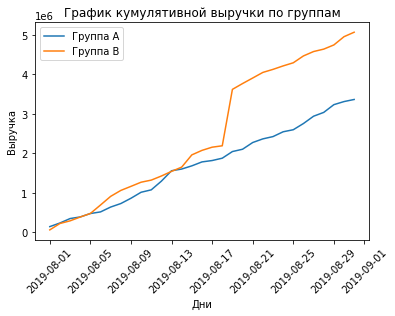

In [20]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='a'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='b'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='Группа А')

# Строим график выручки группы B

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='Группа В')

plt.legend()
plt.xticks(rotation=45)
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дни')
plt.ylabel('Выручка')
plt.show()

###### Вывод
Cегменты B опередил сегмент А уже на пятый день теста. Примерно на 18 день группа В резко вырвалась вперед и продолжила лидировать весь остаток теста. Вероятно в этот момент в группе В случились аномально большие заказы, которые повлияли на результаты. При заключительном анализе их нужно удалить.

#### График кумулятивного среднего чека по группам

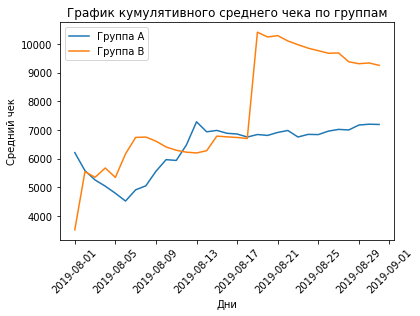

In [21]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='Группа А')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='Группа В')
plt.legend()
plt.xticks(rotation=45)
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дни')
plt.ylabel('Средний чек')
plt.show()

###### Вывод
Кумулятивное значение среднего чека группы В росло более стремительно - рывками на 2, 5, 18 дни. Причем на 18 день рывок был такой, что группа В в два раза опередила показатели группы А. Однако после резкого роста средний чек начал стабильно снижаться.

Динамика группы А более плавная - к 13 дню средний чек на заказ в этой группе достиг пика роста и далее зафиксировался на уровне 7 000 руб.

Резкие рывки роста среднего чека в группе В выглядят подозрительно. Возможно на результат группы В влияют аномально дорогие заказы.

#### График относительного изменения кумулятивного среднего чека группы B к группе A

In [22]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['_а', '_b'])
mergedCumulativeRevenue


,date,revenue_а,orders_а,revenue_b,orders_b
0,2019-08-01,142779,23,59758,17
1,2019-08-02,234381,42,221801,40
2,2019-08-03,346854,66,288850,54
3,2019-08-04,388030,77,385740,68
4,2019-08-05,474413,99,475648,89
5,2019-08-06,515332,114,690490,112
6,2019-08-07,638580,130,909654,135
7,2019-08-08,727219,144,1059795,157
8,2019-08-09,861456,155,1162961,176
9,2019-08-10,1013731,170,1268123,198


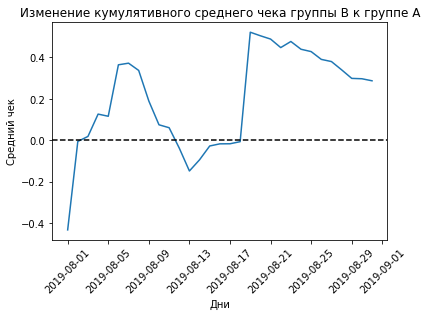

In [23]:
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenue_b']/mergedCumulativeRevenue['orders_b'])/(mergedCumulativeRevenue['revenue_а']/mergedCumulativeRevenue['orders_а'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.xticks(rotation=45)
plt.title('Изменение кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дни')
plt.ylabel('Средний чек')
plt.show()

###### Вывод

Результаты теста значительно и резко менялись в несколько дат. Резкий рост примерно на 2,6 и 18 день, а затем стабильное и снижение. Видимо на всплески оказывали влияние аномальные дорогостоящие заказы.

#### График кумулятивного среднего количества заказов на посетителя по группам

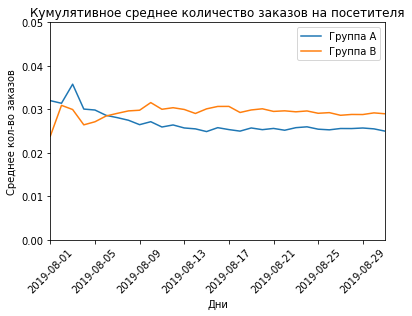

In [24]:
# считаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='a']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='b']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='Группа А')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='Группа B')
plt.legend()

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0, 0.05])

plt.xticks(rotation=45)
plt.title('Кумулятивное среднее количество заказов на посетителя')
plt.xlabel('Дни')
plt.ylabel('Среднее кол-во заказов')
plt.show()

###### Вывод
В начале теста (примерно до 6 дня) сегмент A имел большее кумулятивное среднее количество заказов, но долее сегмент B превзошел сегмент А и далее лидировал до конца теста.

#### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

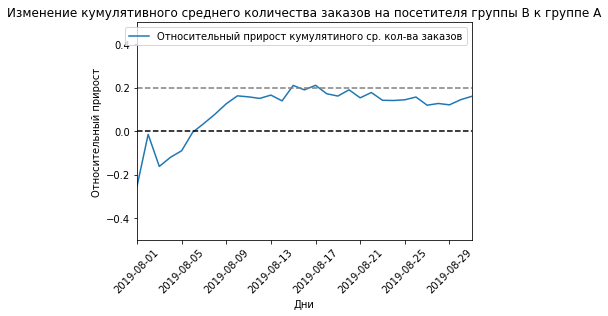

In [25]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['_a', '_b'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversion_b']/mergedCumulativeConversions['conversion_a']-1, label="Относительный прирост кумулятиного ср. кол-ва заказов")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.5, 0.5])

plt.xticks(rotation=45)
plt.title('Изменение кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дни')
plt.ylabel('Относительный прирост')
plt.show()

###### Вывод
Примерно до шестого дня группа В по среднему количеству заказов показывала себя хуже, чем группа А. С 6 по 10 день группа В выдала достаточно резкий рост, на 15 - 17 день теста группа В достигала 20% прироста относительно группы А. Но далее начало снижение среднего количества заказов. Возможно прирост группы В связан с аномально частыми заказами. Можно предположить, что если тест будет продолжен, то тенденция к снижению прироста группы В над группой А будет продолжена.  

#### Точечный график количества заказов по пользователям

In [26]:
# Найдем число заказов по пользователям.  

ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

ordersByUsers.columns = ['visitor_id', 'transaction']

# Отсортируем полученный датафрейм по убыванию количества заказов пользователей, выведем на экран первые 10 строк.
print(ordersByUsers.sort_values(by='transaction', ascending=False).head(10))

     visitor_id  transaction
908  3967698036  3          
55   249864742   3          
478  2108163459  3          
687  2988190573  3          
890  3908431265  3          
138  611059232   3          
632  2742574263  3          
157  678354126   2          
323  1404560065  2          
452  1985475298  2          


В датафрейме ordersByUsers мы получили число заказов по пользователям. Перейдем к визуальному анализу.

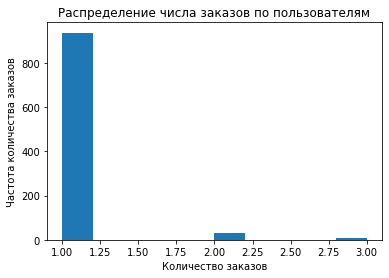

In [27]:
# Построим гистограмму распределения числа заказов по пользователям

plt.hist(ordersByUsers['transaction']) 
plt.title('Распределение числа заказов по пользователям')
plt.xlabel('Количество заказов')
plt.ylabel('Частота количества заказов')
plt.show()

###### Вывод 
Большинство пользователей совершило всего 1 заказ. Однако не ясно, сколько пользователей заказало 2, 3 и более раза. Построим точечный график количества заказов по пользователям методом scatter().

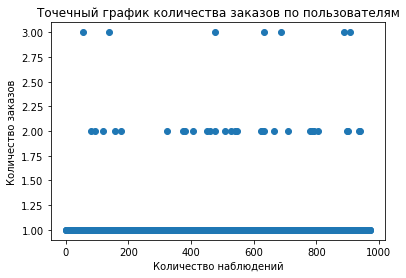

In [28]:
# создаем сгенерированные номера наблюдений в переменной x_values - серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))

# количество заказов
plt.scatter(x_values, ordersByUsers['transaction'])
plt.title('Точечный график количества заказов по пользователям')
plt.xlabel('Количество наблюдений')
plt.ylabel('Количество заказов')
plt.show()

###### Вывод
Основная масса пользователей заказывала 1 раз. Пользователей заказывавших 2 раза - значительно меньше. Пользователей заказавших 3 раза - всего шесть. Эти пользователи вполне могут быть аномальными.

#### Перцентили количества заказов на пользователя

С помощью подсчета выборочных перцентилей количества заказов (95-го и 99-го) на пользователяперцентилей определим какое количество заказов на пользователя можно считать нормальным, а какое аномально высоким.

In [29]:
# Находим перцентили с помощью метода np.percentile('column', [percentile1, percentile2, percentile3]) .
print("95-й перцентиль количества заказов на пользователя:", np.percentile(ordersByUsers['transaction'], [95])) 

print("99-й перцентиль количества заказов на пользователя:", np.percentile(ordersByUsers['transaction'], [99]))

95-й перцентиль количества заказов на пользователя: [1.]
99-й перцентиль количества заказов на пользователя: [2.]


###### Вывод
Данные свитетельствуют, что 95% покупателей совершали только 1 заказ. А 2 и более заказа совершал всего 1% пользователей.

Аномальными будем считать пользователей, которые совершили более 1 заказа.

#### Точечный график стоимостей заказов

Для начала построим гистограмму распределения стоимостей заказов (выручек, revenue) с заказов методом hist().

      transaction_id  visitor_id       date  revenue group
425   590470918       1920142716 2019-08-19  1294500  b   
1196  3936777065      2108080724 2019-08-15  202740   b   
1136  666610489       1307669133 2019-08-13  92550    a   
744   3668308183      888512513  2019-08-27  86620    b   
743   3603576309      4133034833 2019-08-09  67990    a   
1103  1348774318      1164614297 2019-08-12  66350    a   
1099  316924019       148427295  2019-08-12  65710    a   
949   1347999392      887908475  2019-08-21  60450    a   
940   2420050534      4003628586 2019-08-08  58550    b   
131   3163614039      2254586615 2019-08-22  53904    a   


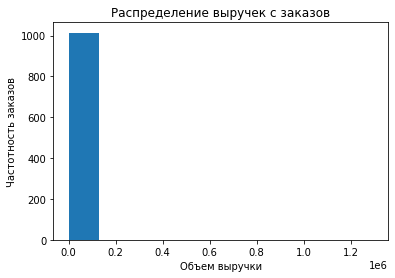

In [30]:
# отсортируем датафрейм с заказами по выручке
print(orders.sort_values(by='revenue', ascending=False).head(10))

# построим гистограмму
plt.hist(orders['revenue']) 
plt.title('Распределение выручек с заказов')
plt.xlabel('Объем выручки')
plt.ylabel('Частотность заказов')
plt.show()

Сумма большинства заказов меньше 100 000 рублей. По данной гистограмме можно сказать только, что стоимости заказов распределены не нормально (ненормальное распределение). 

Видно наличие выручек в 200 тыс руб и 1,2 млн руб. Однако по этому графику мы не можем узнать подробностей о распределении выручек внутри заказов - и дорогих, и дешевых. 

Построим точечный график методом scatter(), чтобы подробнее рассмотреть распределение.

      transaction_id  visitor_id       date  revenue group
425   590470918       1920142716 2019-08-19  1294500  b   
1196  3936777065      2108080724 2019-08-15  202740   b   
1136  666610489       1307669133 2019-08-13  92550    a   
744   3668308183      888512513  2019-08-27  86620    b   
743   3603576309      4133034833 2019-08-09  67990    a   
1103  1348774318      1164614297 2019-08-12  66350    a   
1099  316924019       148427295  2019-08-12  65710    a   
949   1347999392      887908475  2019-08-21  60450    a   
940   2420050534      4003628586 2019-08-08  58550    b   
131   3163614039      2254586615 2019-08-22  53904    a   


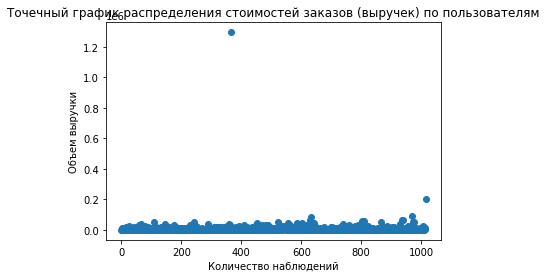

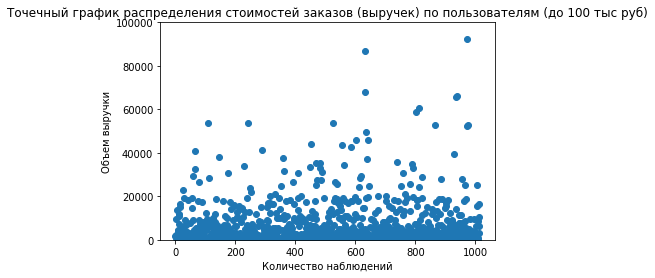

In [31]:
print(orders.sort_values(by='revenue', ascending=False).head(10))

# создаем сгенерированные номера наблюдений в переменной x_values - серия из чисел от 0 до количества наблюдений в orders
x_values_revenue = pd.Series(range(0, len(orders['revenue'])))

# количество выручек
plt.scatter(x_values_revenue, orders['revenue']) 
plt.title('Точечный график распределения стоимостей заказов (выручек) по пользователям')
plt.xlabel('Количество наблюдений')
plt.ylabel('Объем выручки')
plt.show()

# количество выручек
plt.scatter(x_values_revenue, orders['revenue']) 
plt.title('Точечный график распределения стоимостей заказов (выручек) по пользователям (до 100 тыс руб)')
plt.xlabel('Количество наблюдений')
plt.ylabel('Объем выручки')
plt.ylim(0, 100_000)

plt.show()

###### Вывод
Визуально мы наблюдаем, что подавляющее большинство заказов укладываются в стоимость до 100 тыс руб. Аномальных выбросов очень мало - всего один стоимостью 200 тыс руб и один стоимостью более 1,2 млн руб.

#### Перцентили стоимости заказов
Посчитаем 95-й и 99-й перцентили стоимости заказов, чтобы выбрать границу для определения аномальных заказов.

In [32]:
print("95-й перцентили стоимости заказов равен:", np.percentile(orders['revenue'], [95]))

print("99-й перцентили стоимости заказов равен:", np.percentile(orders['revenue'], [99]))

95-й перцентили стоимости заказов равен: [26785.]
99-й перцентили стоимости заказов равен: [53904.]


###### Вывод
Не более, чем у 5% заказов чек дороже 26,7 тыс руб. Заказы стоимостью свыше 53,9 тыс руб совершались только 1% покупателей. 

Аномальными пользователями будем считать тех, кто совершил покупки на сумму более 27 руб.

#### Статзначимость различий в среднем кол-ве заказов по "сырым" данным
Посчитаем статистическую значимость различий в среднем количестве заказов на пользователя между группами по «сырым» данным. Уровень статистической значимости (альфа) установим на уровне 0,05.

Сформулируем гипотезы. 
* Нулевая: различий в среднем количестве заказов на покупателя между группами нет. 

Если P-value будет меньше 0.05, тогда подтвердим нулевую гипотезу и отвергнем альтернативную.

* Альтернативная: различия в среднем между группами есть.

Если P-value будет больше 0.05, тогда отвергнем нулевую гипотезу и подтвердим альтернативную.

In [33]:
visitorsADaily = visitors[visitors['group'] == 'a'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'b'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'a'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'b'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5))



        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01  23              142779           17               
1 2019-08-02  19              91602            23               
2 2019-08-03  24              112473           14               
3 2019-08-04  11              41176            14               
4 2019-08-05  22              86383            21               

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0  59758            23                  142779                
1  162043           42                  234381                
2  67049            66                  346854                
3  96890            77                  388030                
4  89908            99                  474413                

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0  17                  59758                719                
1  40                  221801               619                
2  54                  288850         

In [34]:
# В переменной ordersByUsersA для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов
ordersByUsersA = (
    orders[orders['group'] == 'a']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

# В переменной ordersByUsersB для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов
ordersByUsersB = (
    orders[orders['group'] == 'b']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders']


# Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов.
#Тем, кто ничего не заказал, будут соответствовать нули.
#Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

sampleA = pd.concat(
    [ordersByUsersA['orders'],pd.Series(
        0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), 
        name='orders')],axis=0)

sampleB = pd.concat(
    [ordersByUsersB['orders'],pd.Series(
        0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), 
        name='orders')],axis=0)

print("P-value равен: {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("Относительный прирост среднего количества заказов в группе В относительно группы А равен: {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

P-value равен: 0.011
Относительный прирост среднего количества заказов в группе В относительно группы А равен: 0.160


###### Вывод
Вывод: По «сырым» данным делаем вывод от отсутствии различий в среднем числе заказов на пользователя в группах A и B.

P-value значительно меньше 0.05, потому принимаем нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет.

Относительный прирост среднего количества заказов в группе В относительно группы А равен 16%.

#### Cтатзначимость различий в среднем чеке заказа по "сырым" данным
Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Уровень статистической значимости (альфа) также установим на уровне 0,05.

* Нулевая гипотеза: различий в среднем чеке между группами нет. 

Если P-value будет меньше 0.05, тогда подтвердим нулевую гипотезу и отвергнем альтернативную.

* Альтернативная гипотеза: различия в среднем чеке между группами есть. 

Если P-value будет больше 0.05, тогда отвергнем нулевую гипотезу и подтвердим альтернативную.

In [35]:
# Чтобы рассчитать статзначимость различий в среднем чеке, передадим критерию mannwhitneyu() данные о выручке с заказов. 
print('P-value равен: {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='a']['revenue'], orders[orders['group']=='b']['revenue'])[1]))

# А также найдём относительные различия в среднем чеке между группами.
print('Относительный прирост среднего чека в группе В относительно группы А равен: {0:.3f}'.format(orders[orders['group']=='b']['revenue'].mean()/orders[orders['group']=='a']['revenue'].mean()-1)) 

P-value равен: 0.829
Относительный прирост среднего чека в группе В относительно группы А равен: 0.287


###### Вывод

P-value значительно больше установленного значения альфа (0,05), поэтому отвергаем нулевую гипотезу об отсутствии различий в среднем чеке групп А и В. Различия в среднем чеке группами есть и они статистически значимы.

Относительный прирост среднего чека в группе В относительно группы А равен по сырым данным составляет 28,7%.

#### Статзначимость различий в среднем кол-ве заказов  и среднем чеке по "очищенным" данным
Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя и среднем чеке заказа между группами А и В по «очищенным» данным.

* Нулевая: различий в среднем количестве заказов на пользователя и среднем чеке на заказ между группами нет.

Если P-value будет меньше 0.05, тогда подтвердим нулевую гипотезу и отвергнем альтернативную.

* Альтернативная: различия в среднем количестве заказов на пользователя и среднем чеке на заказ между группами есть.

Если P-value будет больше 0.05, тогда отвергнем нулевую гипотезу и подтвердим альтернативную.


Примем за аномальных пользователей тех, кто совершил более 1 заказа или совершил заказ дороже 30 000 рублей. 

Так мы уберём 1% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами. 

Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 27 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers. 

Узнаем, сколько всего аномальных пользователей атрибутом shape.

In [36]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > int(np.percentile(ordersByUsers['transaction'], [95]))]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > int(np.percentile(ordersByUsers['transaction'], [95]))]['visitor_id'],
    ],
    axis=0,
)

usersWithExpensiveOrders = orders[orders['revenue'] > int(np.percentile(orders['revenue'], [95]))]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

print("Идентификаторы первых 5 аномальных покупателей: \n", abnormalUsers.head(5))
print("\n")
print("Количество аномальных покупателей:", abnormalUsers.shape[0])

Идентификаторы первых 5 аномальных покупателей: 
 568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
Name: visitor_id, dtype: int64


Количество аномальных покупателей: 86


В наших данных обнаружилось 86 аномальных пользователей, которые совершали 2 и более заказов или сумма заказа у них составляла больее 27 тыс руб. 

Узнаем, как действия этих 86 человек повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста.

In [37]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Далее применим статистический критерий Манна-Уитни к полученным выборкам:

In [38]:
print('P-value равен: {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост среднего количества заказов в группе В относительно группы А равен: {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

P-value равен: 0.016
Относительный прирост среднего количества заказов в группе В относительно группы А равен: 0.174


###### Вывод
По очищенным данным также как и по "сырым" мы видим отсутствие статистически значимого отличия в среднем количестве заказов на пользователя. Это подтверждается тем, что P-value в данном случае равен 0.016 — это значительно меньше покателя альфа(0.05).

Относительный прирост среднего количества заказов в группе В относительно группы А равен 17,4%. Однако несмотря на это мы не можем сказать, что группы различаются по количеству заказов на посетилеля.

###### Результаты по среднему количеству заказов (на сырых и очищенных данных) практически не изменились. Произошло ли что-нибудь с результатами по среднему чеку?

In [39]:
print(
    'P-value равен: {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'a',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'b',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Относительный прирост среднего чека в группе В относительно группы А равен: {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'b',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'a',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

P-value равен: 0.727
Относительный прирост среднего чека в группе В относительно группы А равен: -0.034


###### Вывод
Сырые данные о среднем чеке на заказ показывали статистически значимое отличие между группами — средний чек на заказ в группе В был на 28,7% больше, чем в группе А.

Очищенные от аномальных пользователей данные также подтверждают наличие статистического различия в группах (P-value по очищенным данным равен 0.727, что больше 0.05). Однако относительный прирост среднего чека в группе В относительно группы А отричательный (-3%). То есть очищенные данные свидетельствуют о том, что средний чек на заказ в группе В стал хуже.   

## Выводы по А/В тесту

Имеющиеся факты:

1. Нет статистически значимого различия по среднему количеству заказов между группами ни по «сырым», ни по данным после фильтрации аномалий;


2. Есть статистически значимое различия по среднему чеку между группами как по «сырым», так и по данным очищенных от аномальных пользователей. При этом сырые данные демонстрируют прирост среднего чека на заказ в группе В на 28,7% по сравнению с группой А. В то время как очищенные данные говорят: средний чек на заказ в группе В на 3% меньше, чем в группе А.


3. График изменения кумалятивного среднего чека группы В относительно группы А нестабилен. Имеют место несколько всплесков. Резкий рост примерно на 2,6 и 18 день, а затем стабильное и снижение. На всплески вероятно оказывали влияние аномальные дорогие заказы, которые мы отфильтровали из сырых данных. Сейчас с одной стороны мы видим прирост группы В по сравнению с А. Возможно с продолжением теста тенденция на снижение среднего чека будет продолжена и станет более очевидно имеется ли прирост в группе В.


4. График кумулятивного среднего количества заказов на посетителя показыввает, что до шестого дня группа В по среднему количеству заказов показывала себя хуже, чем группа А. после начала теста группа B лидирует по метрике. С 6 по 10 день группа В выдала достаточно резкий рост, на 15 - 17 день теста группа В достигала 20% прироста относительно группы А. Но далее начало снижение среднего количества заказов. Возможно прирост группы В связан с аномально частыми заказами. Можно предположить, что если тест будет продолжен, то тенденция к снижению прироста группы В над группой А будет продолжен. 

###### Основываясь на вышесказанном кажется правильным продолжить тест, чтобы более четко зафиксировать тенденции на снижение среднего чека на заказ и среднего количество заказов на пользователя. Пока мы больше склоняемся к тому, что тест неудачен и группа В не показывает значимого экономического эффекта (на очищенных данных среднее кол-во заказов на пользователя не увеличилось, а средний чек на заказ и вовсе стал меньше).